## Imported Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
pd.set_option("display.max_rows", 200)

## Read CSV File

In [33]:
df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")
df

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,AGRI_SAL,NONAGRI_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_COM,NET_TRANS,NET_MIN,NET_CONS,NET_NEC,EAINC,TOINC,LOSSES,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,T_SUGAR,T_FOOD_NEC,T_COFFEE,T_MINERAL,T_ALCOHOL,T_TOBACCO,T_OTHER_VEG,T_FOOD_HOME,T_FOOD_OUTSIDE,T_FOOD,T_CLOTH,T_FURNISHING,T_HEALTH,T_HOUSING_WATER,T_ACTRENT,T_RENTVAL,T_IMPUTED_RENT,T_BIMPUTED_RENT,T_TRANSPORT,T_COMMUNICATION,T_RECREATION,T_EDUCATION,T_MISCELLANEOUS,T_OTHER_EXPENDITURE,T_OTHER_DISBURSEMENT,T_NFOOD,T_TOTEX,T_TOTDIS,T_OTHREC,T_TOREC,FOOD_ACCOM_SRVC,SEX,AGE,MS,HGC,JOB,OCCUP,KB,CW,HHTYPE,MEMBERS,AGELESS5,AGE5_17,EMPLOYED_PAY,EMPLOYED_PROF,SPOUSE_EMP,BLDG_TYPE,ROOF,WALLS,TENURE,HSE_ALTERTN,TOILET,ELECTRIC,WATER,DISTANCE,RADIO_QTY,TV_QTY,CD_QTY,STEREO_QTY,REF_QTY,WASH_QTY,AIRCON_QTY,CAR_QTY,LANDLINE_QTY,CELLPHONE_QTY,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,0,0,0,0,176000,16000,0,0,33000,0,0,4385,76666,0,0,0,0,0,0,0,0,0,0,0,0,325251,0,30263,29374,5204,3533,2136,2129,6517,1149,2472,1890,6356,0,0,0,91023,23330,114353,11191,3598,586,55128,0,19200,19200,0,17280,1470,49567,41200,18636,260,0,198916,313269,313269,0,325251,0,2,75,3,280,2,,,,2,3,,01,,,3,1,1,1,1,2,1,1,1,,01,01,01,01,01,01,,,,02,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,0,0,0,0,0,14700,0,0,0,0,0,1350,369,0,0,0,0,355776,0,0,8000,0,0,0,363776,382895,0,97693,5820,28836,14484,3016,1230,7885,4145,1875,2532,9076,0,2450,0,176592,8925,185517,3335,4304,1645,24492,0,2700,2700,0,8826,3480,1136,1180,10260,0,0,61108,246625,246625,0,382895,0,1,48,2,250,1,1314,4741,3,2,13,02,04,,01,2,1,5,5,1,2,3,1,1,,01,01,01,02,,,,,,03,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,0,0,0,31500,95000,0,0,1500,10500,0,0,1625,14830,4030,0,0,0,0,0,0,0,0,0,0,4030,173985,0,14699,13457,7811,1222,1788,2610,5560,1212,1500,582,2704,2070,0,0,53145,1500,54645,5455,3161,7258,40560,0,15000,15000,0,10380,5598,0,0,10224,1615,5000,86321,140966,145966,3684,177669,0,1,55,2,552,2,,,,2,2,,,,,2,2,1,1,1,2,1,1,1,,01,01,01,,01,,01,01,,01,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,0,0,0,0,66000,0,0,0,14000,0,0,7649,29394,48010,2250,0,0,0,0,0,0,0,0,0,50260,173303,0,27846,7787,5106,4112,1713,1530,5435,2262,2539,1386,1214,0,0,0,60930,11130,72060,6750,21548,5400,33714,0,6000,6000,0,3210,2502,1012,430,10020,15,0,84601,156661,156661,23580,196883,0,1,44,2,830,1,6111,0112,4,1,4,,02,,01,2,1,1,1,1,2,1,1,6,00003,01,01,01,01,01,02,,,,02,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,0,32000,32000,12600,0,18000,0,0,0,0,0,7359,130,0,0,0,0,0,0,0,63320,0,0,0,63320,187409,0,29573,11704,8765,4056,1138,1385,4250,1956,1272,1144,1430,1950,1638,0,66673,5180,71853,2390,2871,90,70812,0,54000,54000,0,10050,1902,425,10600,5274,0,0,108002,179855,179855,2300,189709,0,1,42,2,350,1,5220,4775,1,2,5,,02,01,01,2,1,1,1,1,2,1,1,1,,01,01,01,,01,01,,,,01,,,,01,0.946172,37481.80,6,6,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40166,12,9804029001,18,568,1,22000,114062,271.25,963.2264,5.0,0,0,0,0,10000,8000,0,0,0,0,0,0,140,0,0,0,0,123968,0,0,0,0,0,0,123968,150508,0,35755,1148,20122,4580,784,1194,4570,1036,738,1333,2748,0,0,0,74008,19900,93908,903,1387,62,13380,0,8400,8400,0,1632,3960,120,1100,3990,493,0,2

In [23]:
df.dtypes

W_REGN                    int64
W_OID                     int64
W_SHSN                    int64
W_HCN                     int64
URB                       int64
RSTR                      int64
PSU                       int64
BWEIGHT                 float64
RFACT                   float64
FSIZE                   float64
AGRI_SAL                  int64
NONAGRI_SAL               int64
WAGES                     int64
NETSHARE                  int64
CASH_ABROAD               int64
CASH_DOMESTIC             int64
RENTALS_REC               int64
INTEREST                  int64
PENSION                   int64
DIVIDENDS                 int64
OTHER_SOURCE              int64
NET_RECEIPT               int64
REGFT                     int64
NET_CFG                   int64
NET_LPR                   int64
NET_FISH                  int64
NET_FOR                   int64
NET_RET                   int64
NET_MFG                   int64
NET_COM                   int64
NET_TRANS                 int64
NET_MIN 

## Selected DF only
* Region: W_REGN
* Urban/Regional: URB (1 = urban, 2 = rural)
* Total Income: TOINC
* Total Expidenture: T_TOTEX

In [36]:
df = df[["W_REGN","URB","TOINC", "T_TOTEX"]]
df = df.fillna("")
df.head(41)

,W_REGN,URB,TOINC,T_TOTEX
0,14,2,325251,313269
1,14,2,382895,246625
2,14,2,173985,140966
3,14,2,173303,156661
4,14,2,187409,179855
5,14,2,1185549,848874
6,14,2,141000,130220
7,14,2,87955,111541
8,14,2,274676,133581
9,14,2,148394,160655


## Question:
What are the top 10 regions that has the highest average total income?

In [35]:
df.agg({"TOINC": ["mean", "count"]})

W_REGN     int64
URB        int64
TOINC      int64
T_TOTEX    int64
dtype: object

<Axes: xlabel='TOINC', ylabel='T_TOTEX'>

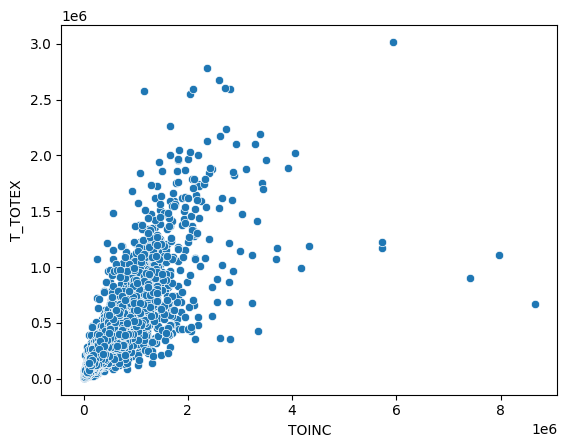

In [37]:
sns.scatterplot(x = "TOINC",y = "T_TOTEX", data=df)